In [126]:
import pandas as pd

In [127]:
df = pd.read_csv('./data/CHMF_news.csv')
df.head()

,url,content,date
0,https://www.finam.ru/publications/item/vysokik...,Северсталь может пересмотреть инвестиции в 202...,23.12.24 11:20
1,https://www.finam.ru/publications/item/aktsii-...,Индекс МосБиржи взлетел почти на 9% после реше...,23.12.24 09:50
2,https://www.finam.ru/publications/item/indeks-...,"Во вторник, 17 декабря, российский фондовый ры...",17.12.24 19:26
3,https://www.finam.ru/publications/item/portfel...,Российский рынок приближается к завершению год...,17.12.24 18:08
4,https://www.finam.ru/publications/item/dividen...,Российский фондовый рынок после стремительного...,17.12.24 14:31


In [128]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 0 to 1073
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      1070 non-null   object
 1   content  1070 non-null   object
 2   date     1070 non-null   object
dtypes: object(3)
memory usage: 33.4+ KB


In [129]:
df['Date'] = pd.to_datetime(df.date).dt.date
df.drop('date', axis=1, inplace=True)
df.head()

C:\Users\andrey\AppData\Local\Temp\ipykernel_7488\780719842.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df.date).dt.date


,url,content,Date
0,https://www.finam.ru/publications/item/vysokik...,Северсталь может пересмотреть инвестиции в 202...,2024-12-23
1,https://www.finam.ru/publications/item/aktsii-...,Индекс МосБиржи взлетел почти на 9% после реше...,2024-12-23
2,https://www.finam.ru/publications/item/indeks-...,"Во вторник, 17 декабря, российский фондовый ры...",2024-12-17
3,https://www.finam.ru/publications/item/portfel...,Российский рынок приближается к завершению год...,2024-12-17
4,https://www.finam.ru/publications/item/dividen...,Российский фондовый рынок после стремительного...,2024-12-17


In [130]:
df['news_combined'] = df.groupby(['Date'])['content'].transform(lambda x: ' '.join(x))
df.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
df.drop(['content'], axis=1, inplace=True)

In [131]:
df.set_index('Date', inplace=True)
df.head()

,url,news_combined
Date,,
2024-12-23,https://www.finam.ru/publications/item/vysokik...,Северсталь может пересмотреть инвестиции в 202...
2024-12-17,https://www.finam.ru/publications/item/indeks-...,"Во вторник, 17 декабря, российский фондовый ры..."
2024-12-16,https://www.finam.ru/publications/item/aktsion...,"В понедельник, 16 декабря, акционеры «Лензолот..."
2024-12-13,https://www.finam.ru/publications/item/perspek...,Давайте поговорим о нашем видении перспектив р...
2024-09-12,https://www.finam.ru/publications/item/aktsion...,Акционеры «Северстали» на внеочередном общем с...


In [132]:
df = df.sort_index()
df.head()

,url,news_combined
Date,,
2021-01-04,https://www.finam.ru/publications/item/igrokam...,Многие новости мы с вами обсудили еще в прошло...
2021-01-06,https://www.finam.ru/publications/item/minprom...,"МОСКВА, 1 июн - РИА Новости. Вопрос дополнител..."
2021-01-08,https://www.finam.ru/publications/item/severst...,"С июля 2021 г. ""Северсталь"" стала самым дороги..."
2021-01-09,https://www.finam.ru/publications/item/sobytiy...,"В четверг, 2 августа, ""Северсталь"" закроет див..."
2021-01-10,https://www.finam.ru/publications/item/finalny...,Не успели российские металлурги оправиться пос...


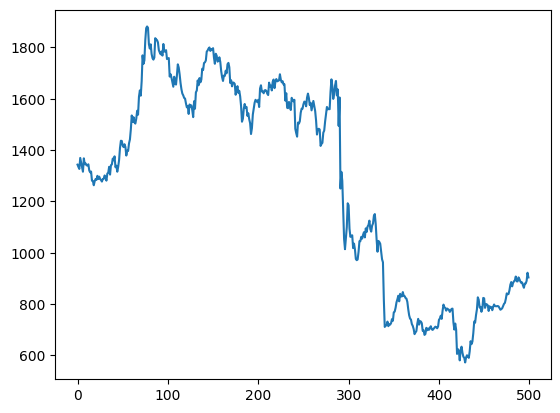

In [133]:
import requests
from matplotlib import pyplot as plt

j = requests.get('http://iss.moex.com/iss/engines/stock/markets/shares/securities/CHMF/candles.json?from=2021-01-04&till=2024-12-28&interval=24').json()
data = [{k : r[i] for i, k in enumerate(j['candles']['columns'])} for r in j['candles']['data']]
frame = pd.DataFrame(data)
plt.plot(list(frame['close']))
plt.savefig("shares.png")

In [134]:
frame['Date'] = pd.to_datetime(frame.begin).dt.date
frame.drop(columns=['begin', 'end'], inplace=True)
frame.set_index('Date', inplace=True)

In [135]:
df = frame.merge(df, how='inner', left_index=True, right_index=True)

In [136]:
df.head()

,open,close,high,low,value,volume,url,news_combined
Date,,,,,,,,
2021-01-04,1324.0,1343.2,1364.0,1324.0,1.349278e+09,999393,https://www.finam.ru/publications/item/igrokam...,Многие новости мы с вами обсудили еще в прошло...
2021-01-06,1334.0,1326.4,1340.6,1317.8,1.117402e+09,840831,https://www.finam.ru/publications/item/minprom...,"МОСКВА, 1 июн - РИА Новости. Вопрос дополнител..."
2021-01-08,1333.0,1369.2,1384.8,1332.8,2.298607e+09,1690048,https://www.finam.ru/publications/item/severst...,"С июля 2021 г. ""Северсталь"" стала самым дороги..."
2021-01-12,1346.0,1332.8,1361.6,1318.0,1.789184e+09,1343224,https://www.finam.ru/publications/item/severst...,"""Северсталь"" снизит выбросы на Череповецком ме..."
2021-02-08,1288.0,1296.4,1306.4,1285.0,1.682197e+09,1297139,https://www.finam.ru/publications/item/rezulta...,С 1 августа вступили в силу временные пошлины ...


In [137]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\andrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [138]:
import re

def clean_text(text):
    text = text.replace('\xa0', ' ').replace('\n', ' ')
    text = re.sub(r'[\s]+', ' ', text)
    return re.sub(r'[^\w\s]', '', text).strip()

def remove_stopwords(text):
    stop_words = set(stopwords.words('russian'))
    words = word_tokenize(text)
    filtered_text = ' '.join([word.lower() for word in words if word.lower() not in stop_words])
    return filtered_text

df['words'] = df['news_combined'].apply(clean_text).apply(remove_stopwords)

In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df['words']
y = (df['close']-df['open'])/df['close'] * 100

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500)
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

param_grids = {
    'LinearRegression': {},  # Нет гиперпараметров для настройки
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
    },
    'SVR': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
    },
}

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
}

metrics = {
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'R2': r2_score,
}

# Результаты
results = {}

# Обучение моделей
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Настройка гиперпараметров
    grid_search = GridSearchCV(model, param_grids.get(model_name, {}), cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Лучшие параметры и модель
    best_model = grid_search.best_estimator_
    results[model_name] = {'best_params': grid_search.best_params_}

    # Предсказания
    y_pred = best_model.predict(X_test)

    # Оценка метрик
    results[model_name]['metrics'] = {metric_name: metric_func(y_test, y_pred) for metric_name, metric_func in metrics.items()}
    print(f"Completed {model_name}: {results[model_name]['metrics']}")

# Вывод результатов
print("\nSummary of Results:")
for model_name, result in results.items():
    print(f"{model_name}: Best Params: {result['best_params']} - Metrics: {result['metrics']}")

Training LinearRegression...
Completed LinearRegression: {'MSE': 19.88352846192357, 'MAE': 2.8376666388548877, 'R2': -0.40328412998624574}
Training RandomForest...
Completed RandomForest: {'MSE': 14.546010229676234, 'MAE': 2.1954233378850376, 'R2': -0.026587677786215957}
Training SVR...
Completed SVR: {'MSE': 14.26935326402149, 'MAE': 2.0782890124870255, 'R2': -0.0070625552659902}

Summary of Results:
LinearRegression: Best Params: {} - Metrics: {'MSE': 19.88352846192357, 'MAE': 2.8376666388548877, 'R2': -0.40328412998624574}
RandomForest: Best Params: {'max_depth': 20, 'n_estimators': 100} - Metrics: {'MSE': 14.546010229676234, 'MAE': 2.1954233378850376, 'R2': -0.026587677786215957}
SVR: Best Params: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} - Metrics: {'MSE': 14.26935326402149, 'MAE': 2.0782890124870255, 'R2': -0.0070625552659902}
